In [2]:
import pickle
import random
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import pickle
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import seaborn as sns

2022-07-13 19:16:57.348789: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-13 19:16:57.395325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/smalu/root_install/lib
2022-07-13 19:16:57.395332: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
with open('timeDiff_ER.pickle', 'rb') as handle:
    ER = pickle.load(handle)

In [19]:
with open('timeDiff_NR.pickle', 'rb') as handle1:
    NR = pickle.load(handle1)

In [23]:
NR[1][-1]

1.0

In [32]:
labels_test, inputs_test =[], []
        
samples = min(len(ER), len(NR))
random.shuffle(ER)
random.shuffle(NR)
ER = ER[:samples]    #making data equal size
NR = NR[:samples]
ER_NR_test = ER+NR
random.shuffle(ER_NR_test)

for i in range(len(ER_NR_test)):
    labels_test.append(ER_NR_test[i][-1])
    inputs_test.append(ER_NR_test[i][:-2])  #excude E and label
        
labels_test = np.array(labels_test)
inputs_test = np.array(inputs_test, dtype=np.float64)

scaler = StandardScaler()
inputs_test = scaler.fit_transform(inputs_test)

print("Number of Test samples: "+str(samples))

Number of Test samples: 62


In [33]:
#T-SNE
tsne = TSNE(n_components=2, verbose=1, random_state=2)
z = tsne.fit_transform(inputs_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.661823
[t-SNE] KL divergence after 800 iterations: 0.311221


/home/smalu/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/smalu/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


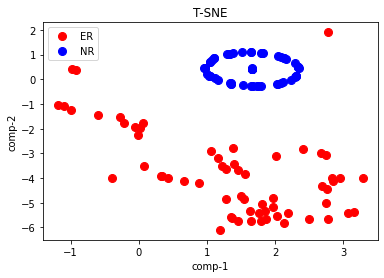

In [34]:
X1, Y1, X2, Y2, = [], [], [], []
for i in range(len(labels_test)):
    if labels_test[i] == 0:
        X1.append(z[i][0])
        Y1.append(z[i][1])
    if labels_test[i] == 1:
        X2.append(z[i][0])
        Y2.append(z[i][1])
        
X1 = np.array(X1)
Y1 = np.array(Y1)
X2 = np.array(X2)
Y2 = np.array(Y2)

plt.plot(X1, Y1, "ro",markersize=8, label="ER")
plt.plot(X2, Y2, "bo",markersize=8, label="NR")
plt.title("T-SNE")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()
plt.show()

In [45]:
#k-means algorithm 
kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42)
#kmeans.fit(inputs_scaled)
kmeans.fit(z)

KMeans(init='random', n_clusters=2, random_state=42)

In [46]:
total = 0
count = 0
for i in range(len(labels_test)):
    if kmeans.labels_[i] == labels_test[i]:
        count+=1
    total+=1
    
print(count/total)
print(list(kmeans.labels_).count(1))

0.8951612903225806
75


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

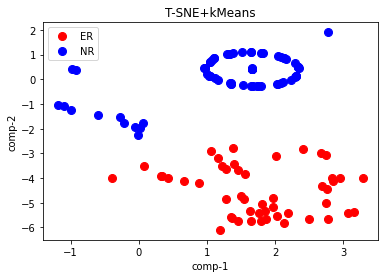

In [49]:
X1, Y1, X2, Y2, = [], [], [], []
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        X1.append(z[i][0])
        Y1.append(z[i][1])
    if kmeans.labels_[i] == 1:
        X2.append(z[i][0])
        Y2.append(z[i][1])
        
X1 = np.array(X1)
Y1 = np.array(Y1)
X2 = np.array(X2)
Y2 = np.array(Y2)

plt.plot(X1, Y1, "ro",markersize=8, label="ER")
plt.plot(X2, Y2, "bo",markersize=8, label="NR")
plt.title("T-SNE+kMeans")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()
plt.show()